In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [77]:
X,Y = make_blobs(500,n_features=2,centers=4,cluster_std=1)

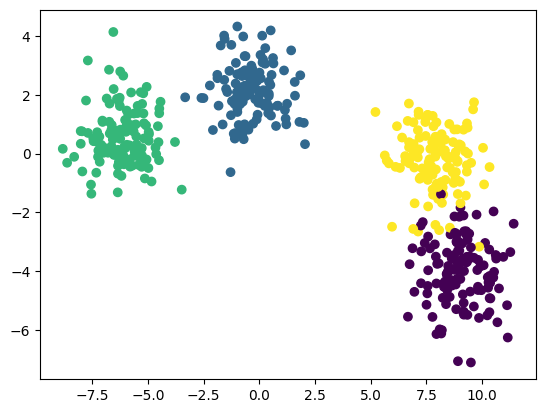

In [78]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [79]:
def intializeClusters(k,n_features=2):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['Center'] = 10*(2*np.random.random((n_features,))-1)
        cluster['Points'] = []
        clusters.append(cluster)
    return clusters

In [80]:
intializeClusters(4)

[{'Center': array([1.8002359 , 7.20775651]), 'Points': []},
 {'Center': array([-7.85191305,  6.45832508]), 'Points': []},
 {'Center': array([-2.14459793,  7.02055075]), 'Points': []},
 {'Center': array([7.20859906, 6.29450241]), 'Points': []}]

In [81]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [87]:
def assignPoints(X,clusters):
    for i in range(X.shape[0]):
        curX = X[i]
        dist = []
        for nc in range(len(clusters)):
            dist.append(distance(clusters[nc]['Center'],curX))
        nc = np.argmin(dist)
        clusters[nc]['Points'].append(curX)

def plotClusters(clusters):
    for nc in range(len(clusters)):
        pts = np.array(clusters[nc]['Points'])
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        center = clusters[nc]['Center']
        # print(center)
        plt.scatter(center[0],center[1],c='black')
    plt.show()

def updateClusters(clusters):
    for nc in range(len(clusters)):
        # cent = clusters[nc]['Center']
        if len(clusters[nc]['Points']) > 0:
            clusters[nc]['Center'] = np.mean(np.array(clusters[nc]['Points']),axis=0)
            clusters[nc]['Points'] = []
            

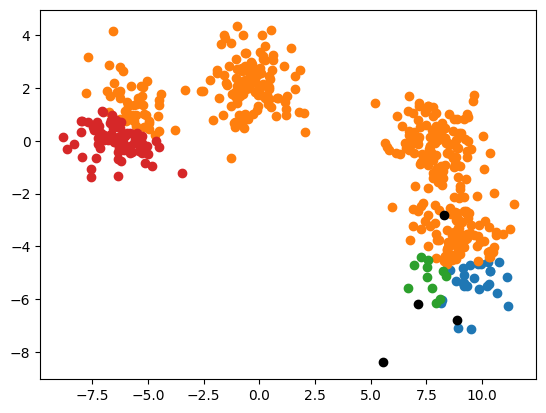

In [94]:
clusters = intializeClusters(4)
assignPoints(X,clusters)
plotClusters(clusters)

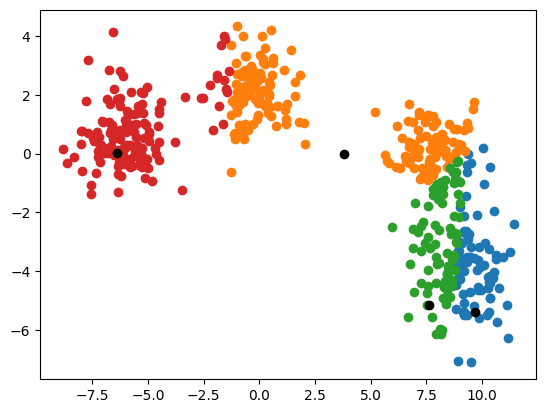

In [95]:
updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)

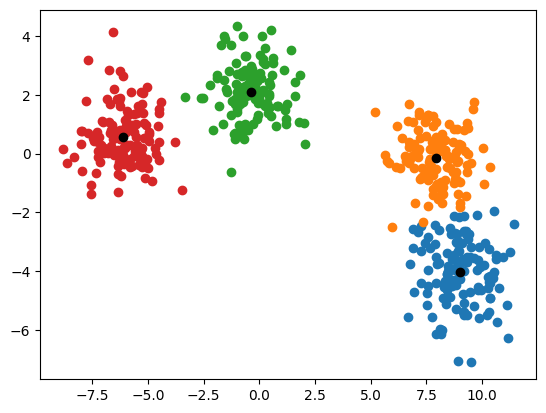

In [96]:
k = 4
clusters = intializeClusters(k)
for i in range(100):
    assignPoints(X,clusters)
    updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)

In [29]:
from sklearn.cluster import KMeans

In [38]:
clf = KMeans(n_clusters=5)
clf.fit(X)
print(clf.cluster_centers_)
print(clf.inertia_)

[[ 0.44498666  4.55422682]
 [ 0.29249108 -3.24936604]
 [-5.45845858 -0.7644994 ]
 [ 6.22154312  8.38939343]
 [ 5.82168661  1.18454907]]
973.4709133756562


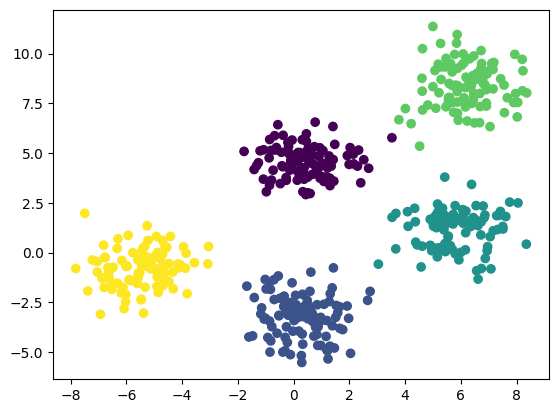

In [33]:
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X,clf.predict(X)))

0.7145793495547736


In [35]:
nk = [i for i in range(2,11)]
sse = []
sil = []
for k in range(2,11):
    clf = KMeans(n_clusters=k)
    clf.fit(X)
    sse.append(clf.inertia_)
    sil.append(silhouette_score(X,clf.predict(X)))

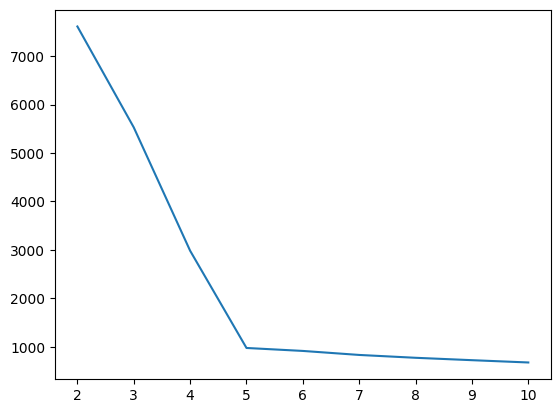

In [36]:
plt.plot(nk,sse)
plt.show()

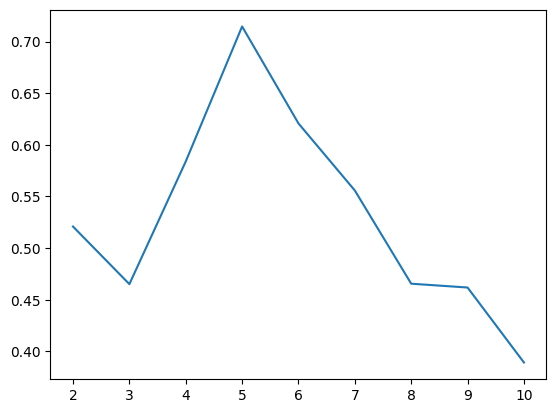

In [37]:
plt.plot(nk,sil)
plt.show()